In [34]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import time

In [35]:
url = 'https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city'

In [36]:
page =requests.get(url)

In [37]:
page.status_code

200

In [38]:
page_content = page.text

In [39]:
soup =BeautifulSoup(page_content)

In [40]:
for x in soup.find_all('a', attrs={'class':'typelink'}):
    print(x.text)

3 BHK Villa
4 BHK Apartment
2 BHK Apartment
3 BHK Apartment
2 BHK Apartment
3 BHK Apartment
3 BHK Apartment
2 BHK Apartment
3 BHK Apartment
4 BHK Villa
4 BHK Apartment
4 BHK Villa
2 BHK Apartment
Residential Plot
Residential Plot
3 BHK Apartment
3 BHK Apartment
3 BHK Apartment
3 BHK Apartment
3 BHK Apartment


In [41]:
for x in soup.find_all('a', attrs={'class':'loclink'}):
    print(x.text)

Kompally, Hyderabad
Kollur, Hyderabad
Isnapur, Hyderabad
Serilingampally, Hyderabad
Dammaiguda, Hyderabad
Kollur, Hyderabad
Jeedimetla, Hyderabad
Saroor Nagar, Hyderabad
Yapral, Hyderabad
Kismatpur, Hyderabad
Gandipet, Hyderabad
Maheshwaram, Hyderabad
Kollur, Hyderabad
Sultanpur, Hyderabad
Sangareddy, Hyderabad
Kokapet, Hyderabad
Manikonda, Hyderabad
Bandlaguda Jagir, Hyderabad
Bowrampet, Hyderabad
Yapral, Hyderabad


In [42]:
for x in soup.find_all('div', attrs={'data-type':'price-link'}):
    print(x.text)

 2.48 Cr
 1.58 Cr
 43.47 L
 1.99 Cr
 50.01 L
 94.98 L
 1.08 Cr
 85.15 L
 93.69 L
 3.64 Cr
 3.96 Cr
 4.56 Cr
 64.72 L
 45.09 L
 36 L
 1.1 Cr
 1.79 Cr
 1.02 Cr
 64.47 L
 1.55 Cr


In [43]:
for x in soup.find_all('td', attrs={'class':'size'}):
    print(x.text)

3209 
3300 
1144 
2548 
1042 
1900 
1965 
1310 
1735 
3062 
5080 
4685 
1295 
1503 
1800 
1471 
2810 
1339 
1535 
2545 


In [44]:
for x in soup.find_all('div', attrs={'class':'seller-info'}):
    print(x.text)

Saket Engineers Pvt LtdBUILDER0
GHR InfraBUILDER0
MKT Praneeth HomesBUILDER0
Candeur Developers And BuildersBUILDER0
Srija Infra Developers HyderabadBUILDER0
Signature AvenuesBUILDER0
Vasavi GroupBUILDER0
Aavasa ConstructionsBUILDER0
G K ConstructionsBUILDER0
R V Nirmaan Private LimitedBUILDER0
Hallmark BuildersBUILDER0
Vishal Projects LimitedBUILDER0
Ira RealityBUILDER0
Ridge Homes LLPBUILDER0
Haripriya DevelopersBUILDER0
Cyber City OrianaBUILDER0
Anuhar Homes Pvt LtdBUILDER0
Jain Housing Constructions LtdBUILDER0
Vajra Builders And DevelopersBUILDER0
Om Sree Builders And DevelopersBUILDER0


In [45]:
for x in soup.find_all('td', attrs={'class':'lbl rate'}):
    print(x.text)

7,749 / sq ft
4,799 / sq ft
3,800 / sq ft
7,810 / sq ft
4,800 / sq ft
4,999 / sq ft
5,500 / sq ft
6,500 / sq ft
5,400 / sq ft
11,888 / sq ft
7,799 / sq ft
9,754 / sq ft
4,998 / sq ft
3,000 / sq ft
2,000 / sq ft
7,501 / sq ft
6,400 / sq ft
7,650 / sq ft
4,200 / sq ft
6,100 / sq ft


In [46]:
Housetype =[]
Resedentialarea=[]
Price=[]
Areasqft=[]
Builder=[]
Pricesqft=[]
pagenum=[]


for i in range(1,51):
    start_time = time.time()
    url = 'https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page={}'.format(i)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    for x in soup.find_all('div', attrs={'data-type':'listing-card'}):
        housetype = x.find('a', attrs={'class':'typelink'})
        resedentialarea=x.find('a', attrs={'class':'loclink'})
        price=x.find('div', attrs={'data-type':'price-link'})
        areasqft=x.find('td', attrs={'class':'size'})
        builder = x.find('div', attrs={'class':'seller-info'})
        pricesqft = x.find('td', attrs={'class':'lbl rate'})
        
        
        if housetype is None:
            Housetype.append(np.NaN)
        else:
            Housetype.append(housetype.text)
            
        if resedentialarea is None:
            Resedentialarea.append(np.NaN)
        else:
            Resedentialarea.append(resedentialarea.text)
            
        if price is None:
            Price.append(np.NaN)
        else:
            Price.append(price.text)
            
        if areasqft is None:
            Areasqft.append(np.NaN)
        else:
            Areasqft.append(areasqft.text)
            
        if builder is None:
            Builder.append(np.NaN)
        else:
            Builder.append(builder.text)
            
        if pricesqft is None:
            Pricesqft.append(np.NaN)
        else:
            Pricesqft.append(pricesqft.text)
            
        pagenum.append(i)

    print('Page {} completed in {} seconds'.format(i, time.time() -  start_time))

Page 1 completed in 0.7278769016265869 seconds
Page 2 completed in 0.6755199432373047 seconds
Page 3 completed in 0.8255500793457031 seconds
Page 4 completed in 0.7365009784698486 seconds
Page 5 completed in 0.7382090091705322 seconds
Page 6 completed in 0.7570374011993408 seconds
Page 7 completed in 0.7343006134033203 seconds
Page 8 completed in 0.7223494052886963 seconds
Page 9 completed in 0.7236309051513672 seconds
Page 10 completed in 0.8195371627807617 seconds
Page 11 completed in 0.8010373115539551 seconds
Page 12 completed in 0.7994792461395264 seconds
Page 13 completed in 0.7378993034362793 seconds
Page 14 completed in 0.741788387298584 seconds
Page 15 completed in 0.8362071514129639 seconds
Page 16 completed in 0.7555811405181885 seconds
Page 17 completed in 0.7846901416778564 seconds
Page 18 completed in 0.7240321636199951 seconds
Page 19 completed in 0.8298032283782959 seconds
Page 20 completed in 0.7198748588562012 seconds
Page 21 completed in 0.7721242904663086 seconds
Pa

In [47]:
len(Housetype)

1000

In [48]:
housing_df = pd.DataFrame({'house_type':Housetype , 'price': Price , 'resedential_area': Resedentialarea , 'area_sqft':Areasqft,'builder':Builder,'price_sqft':Pricesqft, 'pagenumber': pagenum})

In [49]:
housing_df.head()

,house_type,price,resedential_area,area_sqft,builder,price_sqft,pagenumber
0,3 BHK Villa,2.48 Cr,"Kompally, Hyderabad",3209,Saket Engineers Pvt LtdBUILDER0,"7,749 / sq ft",1
1,4 BHK Apartment,1.58 Cr,"Kollur, Hyderabad",3300,GHR InfraBUILDER0,"4,799 / sq ft",1
2,2 BHK Apartment,43.47 L,"Isnapur, Hyderabad",1144,MKT Praneeth HomesBUILDER0,"3,800 / sq ft",1
3,3 BHK Apartment,1.99 Cr,"Serilingampally, Hyderabad",2548,Candeur Developers And BuildersBUILDER0,"7,810 / sq ft",1
4,2 BHK Apartment,50.01 L,"Dammaiguda, Hyderabad",1042,Srija Infra Developers HyderabadBUILDER0,"4,800 / sq ft",1


In [50]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   house_type        1000 non-null   object
 1   price             1000 non-null   object
 2   resedential_area  1000 non-null   object
 3   area_sqft         1000 non-null   object
 4   builder           1000 non-null   object
 5   price_sqft        1000 non-null   object
 6   pagenumber        1000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [51]:
housing_df.isnull().sum()

house_type          0
price               0
resedential_area    0
area_sqft           0
builder             0
price_sqft          0
pagenumber          0
dtype: int64

In [52]:
housing_df['house_type'] = housing_df['house_type'].apply(lambda x: ''.join(x))

In [53]:
housing_df['price'] = housing_df['price'].apply(lambda x: ''.join(x))

In [54]:
housing_df['builder'] = housing_df['builder'].apply(lambda x: ''.join(x))

In [55]:
housing_df['resedential_area'] = housing_df['resedential_area'].apply(lambda x: ''.join(x))

In [56]:
housing_df.to_csv('housing_df.csv')

In [57]:
## extract cost_sqft
regex = r'[0-9]+'
housing_df['cost_sqft']= housing_df['price_sqft'].apply(lambda x: re.compile(regex).findall(x))

In [58]:
housing_df.head()

,house_type,price,resedential_area,area_sqft,builder,price_sqft,pagenumber,cost_sqft
0,3 BHK Villa,2.48 Cr,"Kompally, Hyderabad",3209,Saket Engineers Pvt LtdBUILDER0,"7,749 / sq ft",1,"[7, 749]"
1,4 BHK Apartment,1.58 Cr,"Kollur, Hyderabad",3300,GHR InfraBUILDER0,"4,799 / sq ft",1,"[4, 799]"
2,2 BHK Apartment,43.47 L,"Isnapur, Hyderabad",1144,MKT Praneeth HomesBUILDER0,"3,800 / sq ft",1,"[3, 800]"
3,3 BHK Apartment,1.99 Cr,"Serilingampally, Hyderabad",2548,Candeur Developers And BuildersBUILDER0,"7,810 / sq ft",1,"[7, 810]"
4,2 BHK Apartment,50.01 L,"Dammaiguda, Hyderabad",1042,Srija Infra Developers HyderabadBUILDER0,"4,800 / sq ft",1,"[4, 800]"


In [59]:
housing_df['cost_sqft'] = housing_df['cost_sqft'].apply(lambda x: ''.join(x))
housing_df.tail()

,house_type,price,resedential_area,area_sqft,builder,price_sqft,pagenumber,cost_sqft
995,Residential Plot,11 L,"Yacharam, Hyderabad",1350,sellerVERIFIED OWNER,814 / sq ft,50,814
996,3 BHK Apartment,1.62 Cr,"Kokapet, Hyderabad",1610,sellerVERIFIED OWNER,"10,062 / sq ft",50,10062
997,3 BHK Apartment,85 L,"Bandlaguda Jagir, Hyderabad",1550,sellerVERIFIED OWNER,"5,483 / sq ft",50,5483
998,Residential Plot,28.36 L,"Sadashivpet, Hyderabad",13365,sellerVERIFIED OWNER,212 / sq ft,50,212
999,3 BHK Independent House,1.5 Cr,"Dammaiguda, Hyderabad",1800,sellerVERIFIED OWNER,"8,333 / sq ft",50,8333


In [60]:
# extract room_features
regex = r'(?:Residential Plot|[1-9]\s+(?:BHK|RK))'
housing_df['room_features']= housing_df['house_type'].apply(lambda x: re.compile(regex).findall(x))

In [61]:
housing_df.tail()

,house_type,price,resedential_area,area_sqft,builder,price_sqft,pagenumber,cost_sqft,room_features
995,Residential Plot,11 L,"Yacharam, Hyderabad",1350,sellerVERIFIED OWNER,814 / sq ft,50,814,[Residential Plot]
996,3 BHK Apartment,1.62 Cr,"Kokapet, Hyderabad",1610,sellerVERIFIED OWNER,"10,062 / sq ft",50,10062,[3 BHK]
997,3 BHK Apartment,85 L,"Bandlaguda Jagir, Hyderabad",1550,sellerVERIFIED OWNER,"5,483 / sq ft",50,5483,[3 BHK]
998,Residential Plot,28.36 L,"Sadashivpet, Hyderabad",13365,sellerVERIFIED OWNER,212 / sq ft,50,212,[Residential Plot]
999,3 BHK Independent House,1.5 Cr,"Dammaiguda, Hyderabad",1800,sellerVERIFIED OWNER,"8,333 / sq ft",50,8333,[3 BHK]


In [62]:
housing_df['room_features'] = housing_df['room_features'].apply(lambda x: ''.join(x))
housing_df.tail()

,house_type,price,resedential_area,area_sqft,builder,price_sqft,pagenumber,cost_sqft,room_features
995,Residential Plot,11 L,"Yacharam, Hyderabad",1350,sellerVERIFIED OWNER,814 / sq ft,50,814,Residential Plot
996,3 BHK Apartment,1.62 Cr,"Kokapet, Hyderabad",1610,sellerVERIFIED OWNER,"10,062 / sq ft",50,10062,3 BHK
997,3 BHK Apartment,85 L,"Bandlaguda Jagir, Hyderabad",1550,sellerVERIFIED OWNER,"5,483 / sq ft",50,5483,3 BHK
998,Residential Plot,28.36 L,"Sadashivpet, Hyderabad",13365,sellerVERIFIED OWNER,212 / sq ft,50,212,Residential Plot
999,3 BHK Independent House,1.5 Cr,"Dammaiguda, Hyderabad",1800,sellerVERIFIED OWNER,"8,333 / sq ft",50,8333,3 BHK


In [63]:
housing_df.isnull().sum()

house_type          0
price               0
resedential_area    0
area_sqft           0
builder             0
price_sqft          0
pagenumber          0
cost_sqft           0
room_features       0
dtype: int64

In [64]:
housing_df['price']= housing_df["price"].replace({" L":"*1", " Cr":"*1e2"}, regex=True).map(pd.eval)

In [65]:
housing_df.rename(columns = {'price':'price(L)'},inplace = True)
housing_df.tail()

,house_type,price(L),resedential_area,area_sqft,builder,price_sqft,pagenumber,cost_sqft,room_features
995,Residential Plot,11.00,"Yacharam, Hyderabad",1350,sellerVERIFIED OWNER,814 / sq ft,50,814,Residential Plot
996,3 BHK Apartment,162.00,"Kokapet, Hyderabad",1610,sellerVERIFIED OWNER,"10,062 / sq ft",50,10062,3 BHK
997,3 BHK Apartment,85.00,"Bandlaguda Jagir, Hyderabad",1550,sellerVERIFIED OWNER,"5,483 / sq ft",50,5483,3 BHK
998,Residential Plot,28.36,"Sadashivpet, Hyderabad",13365,sellerVERIFIED OWNER,212 / sq ft,50,212,Residential Plot
999,3 BHK Independent House,150.00,"Dammaiguda, Hyderabad",1800,sellerVERIFIED OWNER,"8,333 / sq ft",50,8333,3 BHK


In [66]:
housing_df.drop(['price_sqft'] , axis=1 , inplace=True)

In [67]:
housing_df.tail()

,house_type,price(L),resedential_area,area_sqft,builder,pagenumber,cost_sqft,room_features
995,Residential Plot,11.00,"Yacharam, Hyderabad",1350,sellerVERIFIED OWNER,50,814,Residential Plot
996,3 BHK Apartment,162.00,"Kokapet, Hyderabad",1610,sellerVERIFIED OWNER,50,10062,3 BHK
997,3 BHK Apartment,85.00,"Bandlaguda Jagir, Hyderabad",1550,sellerVERIFIED OWNER,50,5483,3 BHK
998,Residential Plot,28.36,"Sadashivpet, Hyderabad",13365,sellerVERIFIED OWNER,50,212,Residential Plot
999,3 BHK Independent House,150.00,"Dammaiguda, Hyderabad",1800,sellerVERIFIED OWNER,50,8333,3 BHK


In [68]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        1000 non-null   object 
 1   price(L)          1000 non-null   float64
 2   resedential_area  1000 non-null   object 
 3   area_sqft         1000 non-null   object 
 4   builder           1000 non-null   object 
 5   pagenumber        1000 non-null   int64  
 6   cost_sqft         1000 non-null   object 
 7   room_features     1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [69]:
housing_df['area_sqft']=housing_df['area_sqft'].astype(int)
housing_df['cost_sqft']=housing_df['cost_sqft'].astype(int)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        1000 non-null   object 
 1   price(L)          1000 non-null   float64
 2   resedential_area  1000 non-null   object 
 3   area_sqft         1000 non-null   int32  
 4   builder           1000 non-null   object 
 5   pagenumber        1000 non-null   int64  
 6   cost_sqft         1000 non-null   int32  
 7   room_features     1000 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 54.8+ KB


In [70]:
housing_df.shape

(1000, 8)

In [71]:
housing_df['room_features'].unique()

array(['3 BHK', '4 BHK', '2 BHK', 'Residential Plot', '5 BHK', '8 BHK',
       '1 BHK', '7 BHK', '6 BHK', '1 RK', ''], dtype=object)

In [72]:
housing_df = housing_df.replace(r'^\s*$', np.nan, regex=True)

In [73]:
housing_df.isnull().sum()

house_type          0
price(L)            0
resedential_area    0
area_sqft           0
builder             0
pagenumber          0
cost_sqft           0
room_features       2
dtype: int64

In [74]:
housing_df = housing_df.dropna()

In [75]:
housing_df.shape

(998, 8)

## visualization

### univariate 

<AxesSubplot:xlabel='room_features', ylabel='count'>

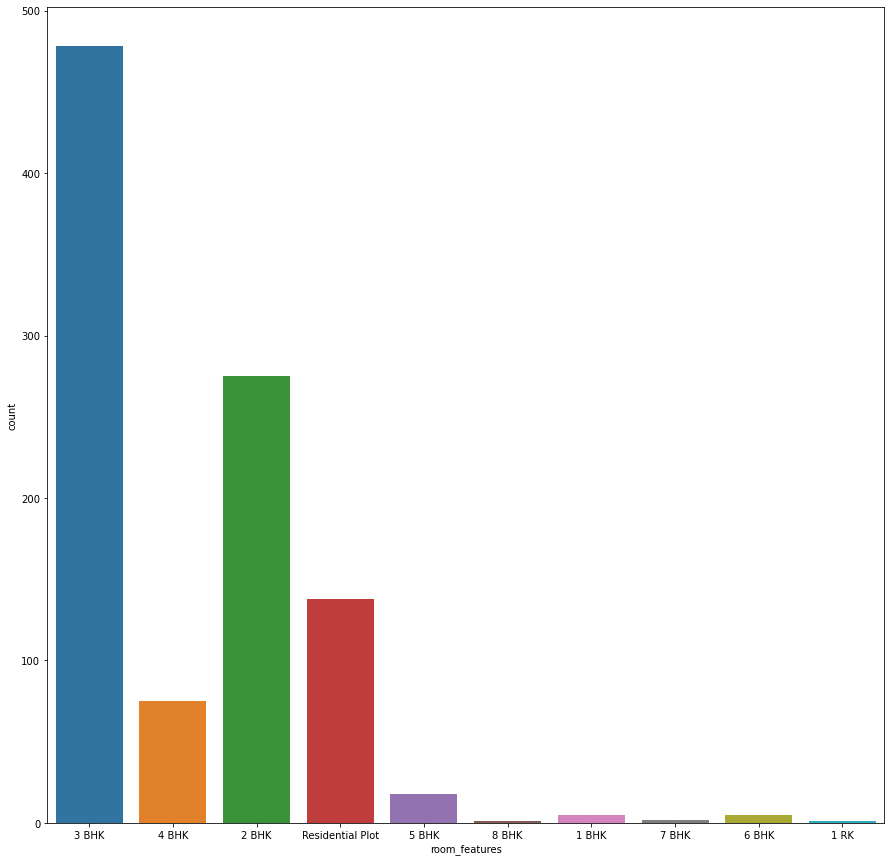

In [76]:
plt.figure(figsize=(15,15))
sns.countplot(housing_df.room_features)

<AxesSubplot:xlabel='room_features'>

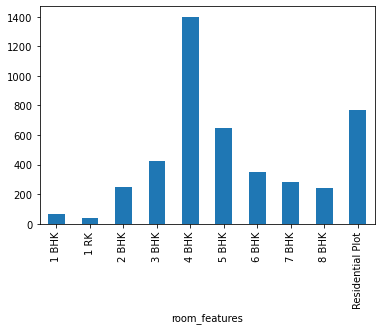

In [77]:
housing_df.groupby(['room_features'])['price(L)'].max().plot(kind = 'bar')

array([[<AxesSubplot:title={'center':'price(L)'}>,
        <AxesSubplot:title={'center':'area_sqft'}>],
       [<AxesSubplot:title={'center':'pagenumber'}>,
        <AxesSubplot:title={'center':'cost_sqft'}>]], dtype=object)

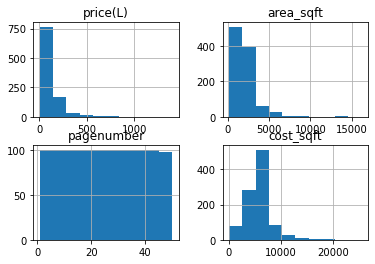

In [78]:
housing_df.hist()

<AxesSubplot:ylabel='price(L)'>

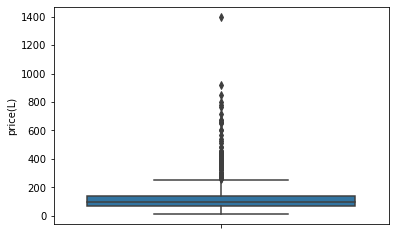

In [79]:
sns.boxplot(y=housing_df['price(L)'])

<AxesSubplot:ylabel='cost_sqft'>

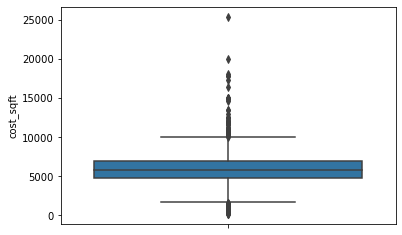

In [80]:
sns.boxplot(y=housing_df['cost_sqft'])

<AxesSubplot:ylabel='area_sqft'>

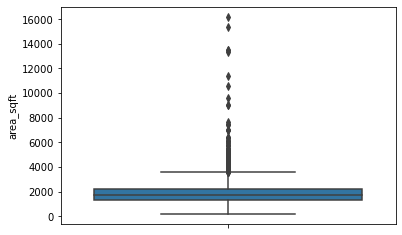

In [81]:
sns.boxplot(y=housing_df['area_sqft'])

### multivariate 

<AxesSubplot:xlabel='room_features', ylabel='price(L)'>

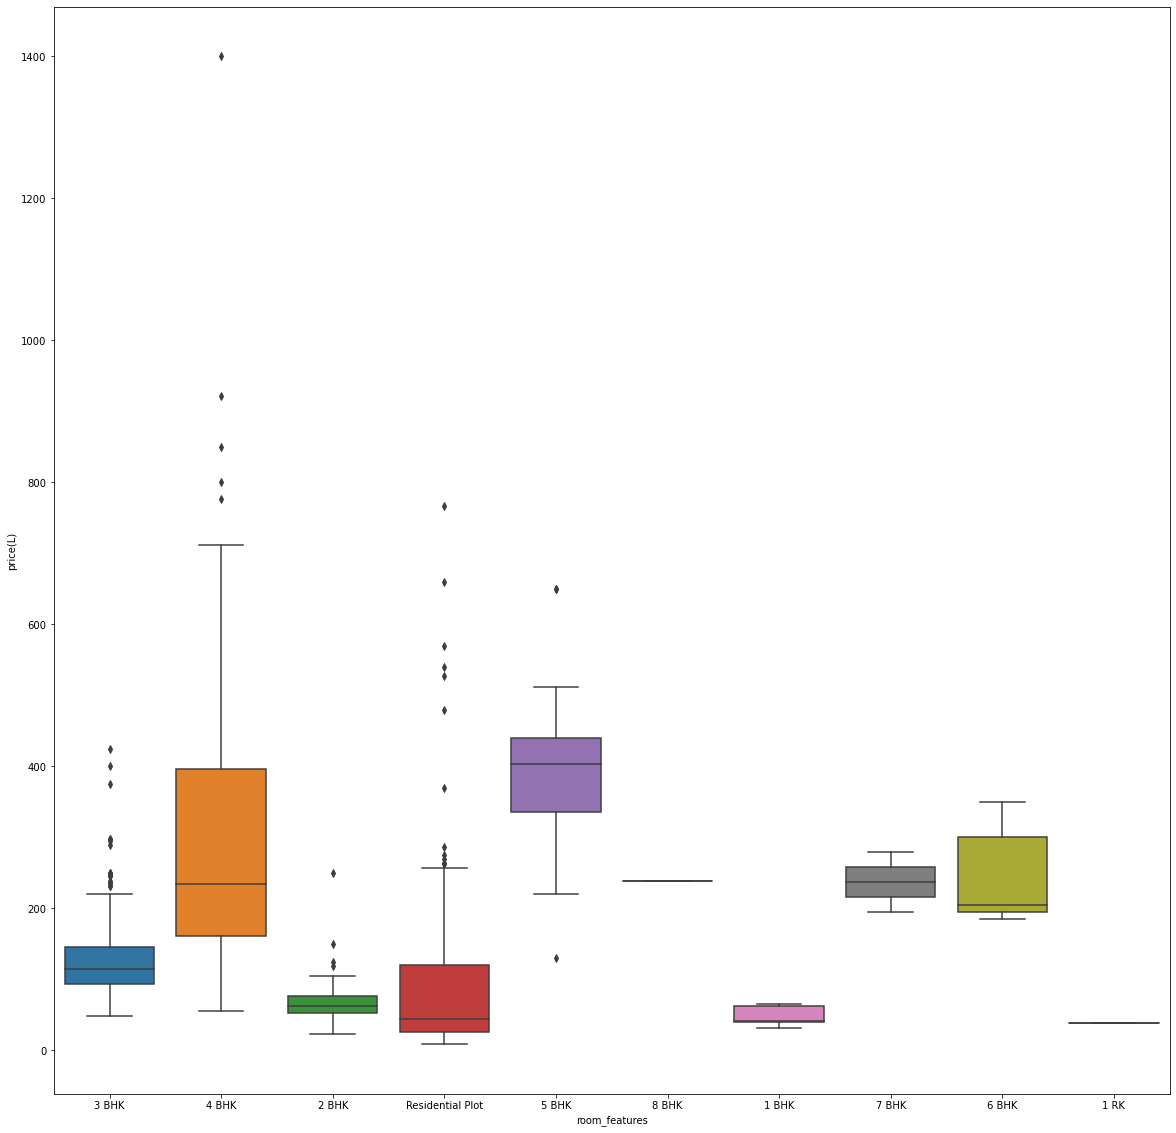

In [82]:
plt.figure(figsize=(20,20))
sns.boxplot(x ='room_features', y = 'price(L)' ,data = housing_df)

<AxesSubplot:xlabel='room_features', ylabel='cost_sqft'>

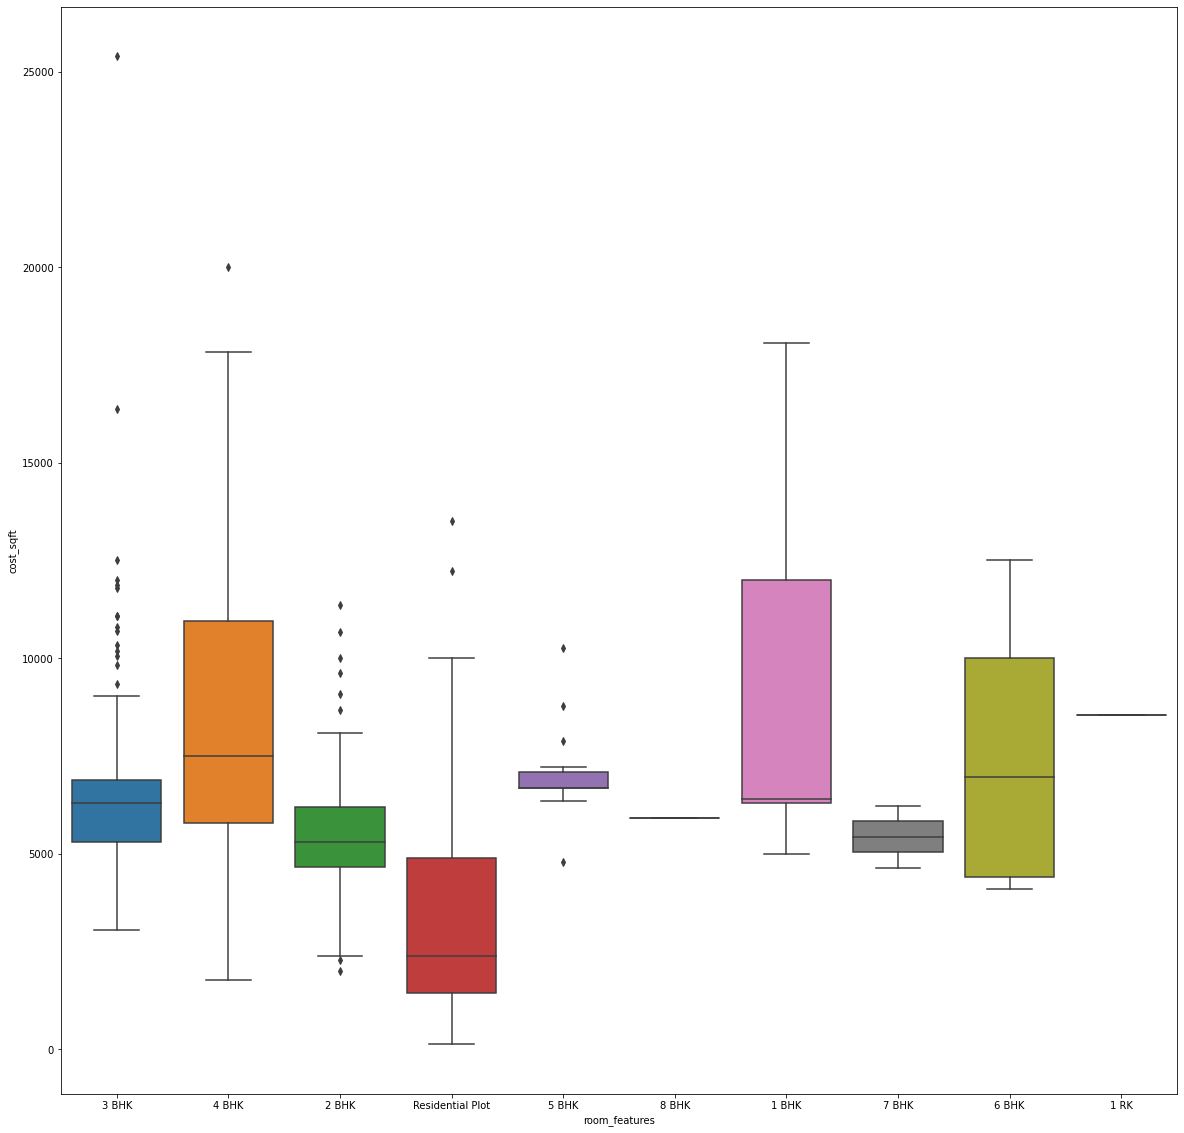

In [83]:
plt.figure(figsize=(20,20))
sns.boxplot(x ='room_features', y = 'cost_sqft' ,data = housing_df)

<AxesSubplot:xlabel='room_features', ylabel='price(L)'>

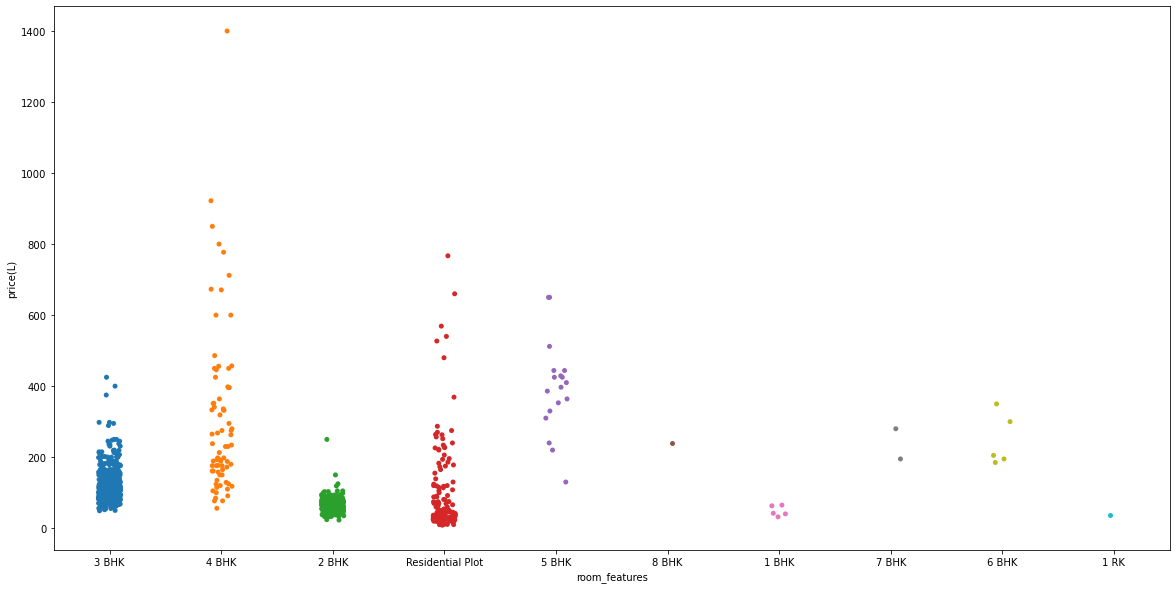

In [84]:
plt.figure(figsize=(20,10))
sns.stripplot(x = 'room_features', y = 'price(L)', data= housing_df)